In [1]:
!pip install yfinance

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB 187.9 kB/s eta 0:00:16
      --------------------------------------- 0.0/3.0 MB 196.9 kB/s eta 0:00:16
      --------------------------------------- 0.1/3.0 MB 280.5 kB/s eta 0:00:11
     - -------------------------------------- 0.1/3.0 MB 425.1 kB/s eta 0:00:07
     -- ------------------------------------- 0.2/3.0 MB 590.8 kB/s eta 0:00:05
     --- ------------------------------------ 0.3/3.0 MB 741.6 kB/s eta 0:00:04
     ----- ---------------------------------- 0.4/3.0 MB 933.2 kB/s eta 0:00:03
     ------- -------------------------------- 0.6/3.0 MB 1.2 MB/s eta 0:00:03
     ---------- ----------------------------- 0.8/3.0 MB 1.6 MB/s eta 0:00:02


In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [6]:
df = yf.download('AAPL', start='2015-01-01', end='2023-12-31')

[*********************100%***********************]  1 of 1 completed


In [7]:
df.head(20)

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.320433,24.789802,23.879981,24.778679,212818400
2015-01-05,23.635284,24.169164,23.448427,24.089082,257142000
2015-01-06,23.637510,23.897776,23.274916,23.699796,263188400
2015-01-07,23.968966,24.069067,23.735393,23.846617,160423600
2015-01-08,24.889908,24.947745,24.180292,24.298192,237458000
2015-01-09,24.916597,25.192435,24.516187,25.063413,214798000
2015-01-12,24.302637,25.054517,24.202535,25.047843,198603200
2015-01-13,24.518412,25.092332,24.227003,24.787576,268367600


In [8]:
data = df[['Close']]

In [9]:
data.head()

Price,Close
Ticker,AAPL
Date,
2015-01-02,24.320433
2015-01-05,23.635284
2015-01-06,23.637510
2015-01-07,23.968966
2015-01-08,24.889908


In [10]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [11]:
# Create sequences
sequence_length = 60
x, y = [], []

for i in range(sequence_length, len(scaled_data)):
    x.append(scaled_data[i-sequence_length:i])
    y.append(scaled_data[i])

x, y = np.array(x), np.array(y)

In [13]:
split = int(0.8 * len(x))
x_train, x_test = x[:split], x[split:]
y_train, y_test = y[:split], y[split:]

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [15]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

C:\Users\mazha\miniconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.fit(x_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 0.0356
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 0.0020
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 0.0017
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 0.0015
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 0.0014
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 0.0013
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0014
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0014
Epoch 9/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0013
Epoch 10/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 0.0012
Epoch 11/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0012
Epoch 12/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0011
Epoch 13/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 9.8499e-04
Epoch 14/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0011
Epoch 15/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 8.7550e

In [27]:
predicted = model.predict(x_test)
predicted = scaler.inverse_transform(predicted)
real = scaler.inverse_transform(y_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


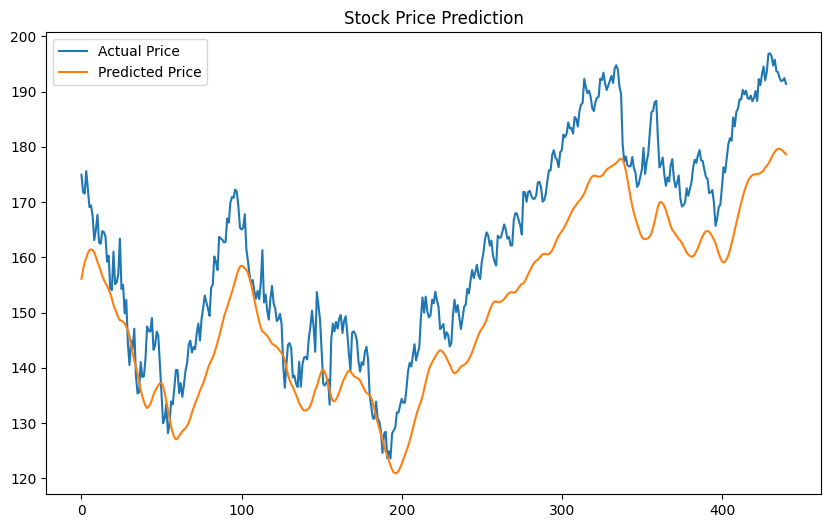

In [24]:
plt.figure(figsize=(10,6))
plt.plot(real, label='Actual Price')
plt.plot(predicted, label='Predicted Price')
plt.legend()
plt.title('Stock Price Prediction')
plt.show()

In [29]:
# Create a DataFrame for comparison
comparison = pd.DataFrame({
    'Actual Price': real.flatten(),
    'Predicted Price': predicted.flatten()
})
print(comparison)

     Actual Price  Predicted Price
0      174.935425       156.113464
1      171.825836       157.765793
2      171.530624       159.023254
3      175.594757       159.921402
4      172.268631       160.763336
..            ...              ...
436    192.444580       179.645020
437    191.897873       179.510391
438    191.997269       179.253815
439    192.424713       178.943298
440    191.380951       178.645050

[441 rows x 2 columns]
